# Simple model of heat transfer
https://learn.openenergymonitor.org/sustainable-energy/building-energy-model/dynamicmodel

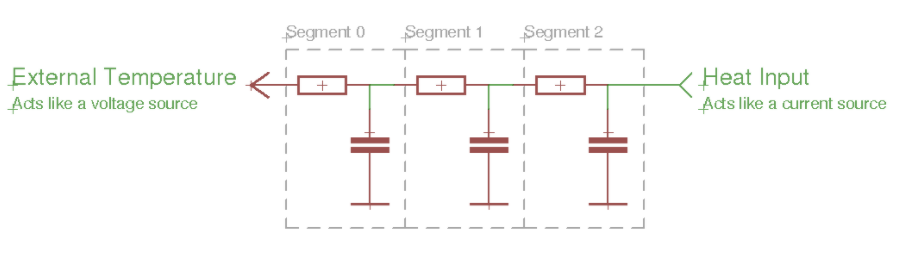

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heatinput = 1000 # Watts
outside = 10 # Celcius
iterations = 1

T3 = []; T2 = []; T1 = [];
k1 = 1.1e7; k2 = 2.5e6; k3 = 6e5; # Heat capacity (J K^-1)
u1 = 100; u2 = 500; u3 = 800; # Thermal conductivity (W m^-1 K^-1)
t1 = 10; t2 = 20; t3 = 15; # Initial temperatures

timestep = 60

for i in range(iterations):
    
    net_heatflow_3 = heatinput - u3*(t3 - t2)
    net_heatflow_2 = u3*(t3 - t2) - u2*(t2 - t1) 
    net_heatflow_1 = u2*(t2 - t1) - u1*(t1 - outside)
    
    t3 += (net_heatflow_3 * timestep) / k3
    t2 += (net_heatflow_2 * timestep) / k2
    t1 += (net_heatflow_1 * timestep) / k1
    
    T3.append(t3)
    T2.append(t2)
    T1.append(t1)
    
T3 = np.array(T3)
T2 = np.array(T2)
T1 = np.array(T1)

time = np.linspace(0,iterations*timestep/(3600*24),iterations, endpoint=False)


In [ ]:
heatinput = 1000 # Watts
outside = 10 # Celcius
iterations = 10000

T3 = []; T2 = []; T1 = [];
k1 = 1.1e7; k2 = 2.5e6; k3 = 6e5; # Heat capacity (J K^-1)
u1 = 100; u2 = 500; u3 = 800; # Thermal conductivity (W m^-1 K^-1)
t1 = 10; t2 = 20; t3 = 15; # Initial temperatures

timestep = 60

for i in range(iterations):
    
    net_heatflow_3 = heatinput - u3*(t3 - t2)
    net_heatflow_2 = u3*(t3 - t2) - u2*(t2 - t1) 
    net_heatflow_1 = u2*(t2 - t1) - u1*(t1 - outside)
    
    t3 += (net_heatflow_3 * timestep) / k3
    t2 += (net_heatflow_2 * timestep) / k2
    t1 += (net_heatflow_1 * timestep) / k1
    
    T3.append(t3)
    T2.append(t2)
    T1.append(t1)
    
T3 = np.array(T3)
T2 = np.array(T2)
T1 = np.array(T1)

time = np.linspace(0,iterations*timestep/(3600*24),iterations, endpoint=False)


In [120]:
A1 = 1 # area of segment 1 (m^2)
L1 = 0.10 # thickness of segment 1 (m)

heat_loss = (u1/L1) * A1 * (T1 - outside)
total_heat_loss = heat_loss.sum()*timestep
print('Total heat loss from Segment 1 to surrounding: {:.2f} Joules'.format(total_heat_loss))

Total heat loss from Segment 1 to surrounding: 4818730764.06 Joules


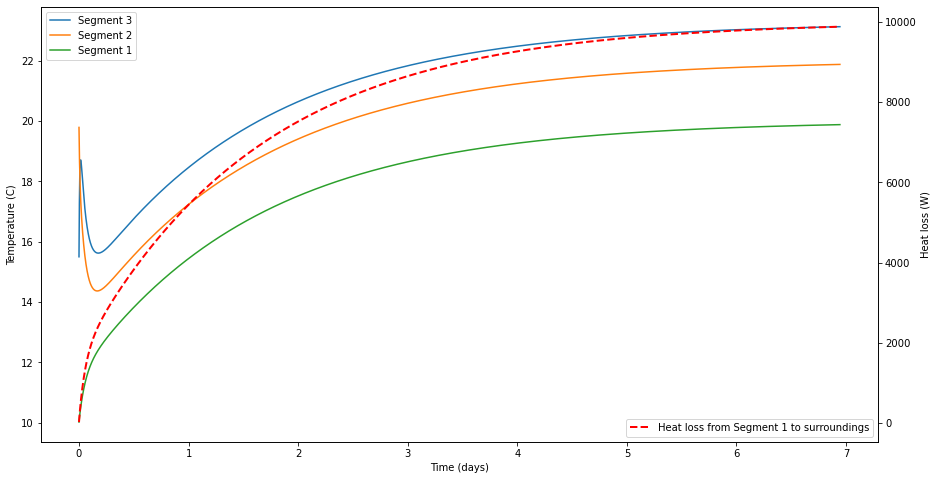

In [121]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(time, T3, label = 'Segment 3')
ax.plot(time, T2, label = 'Segment 2')
ax.plot(time, T1, label = 'Segment 1')
ax.set(xlabel='Time (days)', ylabel='Temperature (C)');
ax.legend()

ax2 = ax.twinx()
ax2.plot(time, heat_loss, label = 'Heat loss from Segment 1 to surroundings', ls='--', lw=2, color='r')
ax2.set(ylabel = 'Heat loss (W)')
ax2.legend(loc=4)